# MNIST Handwriting Classification

Miloy Ajmera (majmera@andrew.cmu.edu) / 17-634: Applied Machine Learning, Spring 2023

In [15]:
import os
import sklearn
import struct
import gzip
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

## Load the MNIST Handwriting Classification dataset.
The goal is to predict the type of letter (y) from all the alphabets

In [16]:
#Unzip the file, and unpack ubyte into numpy array
def unzip_unpack_images_data(file_name):
    data = None
    with gzip.open(os.getcwd() + '\mnist\\' + file_name, 'rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        nrows, ncols = struct.unpack(">II", f.read(8))
        data = np.frombuffer(f.read(), dtype=np.dtype(np.uint8).newbyteorder('>'))
        data = data.reshape((size, nrows, ncols))
    return data

#Unzip the file, and unpack ubyte into numpy array
def unzip_unpack_labels_data(file_name):
    data = None
    with gzip.open(os.getcwd() + '\mnist\\' + file_name, 'rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        data = np.frombuffer(f.read(), dtype=np.dtype(np.uint8).newbyteorder('>'))
    return data

train_file_names = ["train-images-idx3-ubyte.gz","train-labels-idx1-ubyte.gz"]
test_file_names = [ "t10k-images-idx3-ubyte.gz", "t10k-labels-idx1-ubyte.gz"]

X_train_data = unzip_unpack_images_data(train_file_names[0])
X_train = X_train_data.reshape(X_train_data.shape[0], -1)
X_test_data = unzip_unpack_images_data(test_file_names[0])
X_test = X_test_data.reshape(X_test_data.shape[0], -1)
Y_train = unzip_unpack_labels_data(train_file_names[1])
Y_test = unzip_unpack_labels_data(test_file_names[1])

X = np.concatenate((X_train, X_test), axis=0)
Y = np.concatenate((Y_train, Y_test), axis=0)

print(f'Shape of Training Data Set : {X_train.shape} ')
print(f'Shape of Testing Data Set : {X_test.shape} ')
print(f'Shape of Training Labels : {Y_train.shape} ')
print(f'Shape of Training Labels : {Y_test.shape} ')


Shape of Training Data Set : (60000, 784) 
Shape of Testing Data Set : (10000, 784) 
Shape of Training Labels : (60000,) 
Shape of Training Labels : (10000,) 


### Vectorization of Data

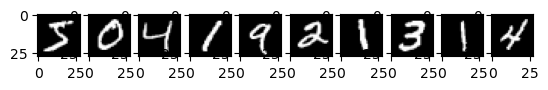

In [17]:
figure, ax = plt.subplots(1, len(np.unique(Y_train)))
for x in np.unique(Y_train):
    ax[x].imshow(X_train_data[x, :, :], cmap='gray')


### Training and Evaluating Models

Accuracy on training data: 82.53%
Accuracy on test data: 83.65%
Model precision: 83.65%
Model precision: 84.45%
Average score: 82.57%
Average accuracy: 96.34%
Average precision: 77.23%
Average recall: 95.81%
Average f1: 85.51%
Confusion Matrix: 
Predction of class probabilities: 
GT: 7, pred: 7, accuracy so far: 100.00%
GT: 2, pred: 2, accuracy so far: 100.00%
GT: 1, pred: 1, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 4, pred: 4, accuracy so far: 100.00%
GT: 1, pred: 1, accuracy so far: 100.00%
GT: 4, pred: 4, accuracy so far: 100.00%
GT: 9, pred: 9, accuracy so far: 100.00%
GT: 5, pred: 4, accuracy so far: 88.89%
GT: 9, pred: 9, accuracy so far: 90.00%
GT: 0, pred: 0, accuracy so far: 90.91%
GT: 6, pred: 6, accuracy so far: 91.67%
GT: 9, pred: 9, accuracy so far: 92.31%
GT: 0, pred: 0, accuracy so far: 92.86%
GT: 1, pred: 1, accuracy so far: 93.33%
GT: 5, pred: 3, accuracy so far: 87.50%
GT: 9, pred: 9, accuracy so far: 88.24%
GT: 7, pred: 7, accuracy so far

GT: 2, pred: 8, accuracy so far: 83.73%
GT: 3, pred: 3, accuracy so far: 83.73%
GT: 4, pred: 4, accuracy so far: 83.73%
GT: 5, pred: 8, accuracy so far: 83.72%
GT: 6, pred: 6, accuracy so far: 83.72%
GT: 7, pred: 2, accuracy so far: 83.71%
GT: 0, pred: 0, accuracy so far: 83.72%
GT: 1, pred: 8, accuracy so far: 83.71%
GT: 2, pred: 2, accuracy so far: 83.71%
GT: 7, pred: 2, accuracy so far: 83.70%
GT: 8, pred: 8, accuracy so far: 83.70%
GT: 6, pred: 6, accuracy so far: 83.70%
GT: 3, pred: 5, accuracy so far: 83.69%
GT: 9, pred: 4, accuracy so far: 83.68%
GT: 7, pred: 2, accuracy so far: 83.67%
GT: 1, pred: 1, accuracy so far: 83.68%
GT: 9, pred: 4, accuracy so far: 83.67%
GT: 3, pred: 3, accuracy so far: 83.67%
GT: 9, pred: 9, accuracy so far: 83.67%
GT: 6, pred: 6, accuracy so far: 83.67%
GT: 1, pred: 1, accuracy so far: 83.67%
GT: 7, pred: 8, accuracy so far: 83.66%
GT: 2, pred: 2, accuracy so far: 83.67%
GT: 4, pred: 4, accuracy so far: 83.67%
GT: 4, pred: 4, accuracy so far: 83.67%


GT: 3, pred: 3, accuracy so far: 83.73%
GT: 0, pred: 0, accuracy so far: 83.74%
GT: 8, pred: 8, accuracy so far: 83.74%
GT: 3, pred: 3, accuracy so far: 83.74%
GT: 0, pred: 0, accuracy so far: 83.74%
GT: 6, pred: 6, accuracy so far: 83.74%
GT: 1, pred: 1, accuracy so far: 83.74%
GT: 7, pred: 7, accuracy so far: 83.75%
GT: 8, pred: 8, accuracy so far: 83.75%
GT: 0, pred: 0, accuracy so far: 83.75%
GT: 9, pred: 7, accuracy so far: 83.74%
GT: 2, pred: 2, accuracy so far: 83.74%
GT: 6, pred: 6, accuracy so far: 83.74%
GT: 7, pred: 7, accuracy so far: 83.75%
GT: 1, pred: 1, accuracy so far: 83.75%
GT: 9, pred: 9, accuracy so far: 83.75%
GT: 6, pred: 6, accuracy so far: 83.75%
GT: 9, pred: 9, accuracy so far: 83.75%
GT: 4, pred: 8, accuracy so far: 83.74%
GT: 9, pred: 8, accuracy so far: 83.73%
GT: 9, pred: 9, accuracy so far: 83.74%
GT: 6, pred: 6, accuracy so far: 83.74%
GT: 7, pred: 7, accuracy so far: 83.74%
GT: 1, pred: 1, accuracy so far: 83.74%
GT: 2, pred: 2, accuracy so far: 83.74%


GT: 0, pred: 0, accuracy so far: 83.96%
GT: 6, pred: 6, accuracy so far: 83.96%
GT: 2, pred: 2, accuracy so far: 83.96%
GT: 1, pred: 1, accuracy so far: 83.97%
GT: 1, pred: 1, accuracy so far: 83.97%
GT: 3, pred: 3, accuracy so far: 83.97%
GT: 2, pred: 6, accuracy so far: 83.96%
GT: 7, pred: 7, accuracy so far: 83.96%
GT: 7, pred: 7, accuracy so far: 83.96%
GT: 8, pred: 8, accuracy so far: 83.96%
GT: 8, pred: 8, accuracy so far: 83.97%
GT: 7, pred: 7, accuracy so far: 83.97%
GT: 8, pred: 8, accuracy so far: 83.97%
GT: 4, pred: 4, accuracy so far: 83.97%
GT: 6, pred: 6, accuracy so far: 83.97%
GT: 0, pred: 0, accuracy so far: 83.97%
GT: 2, pred: 2, accuracy so far: 83.98%
GT: 0, pred: 0, accuracy so far: 83.98%
GT: 7, pred: 7, accuracy so far: 83.98%
GT: 0, pred: 0, accuracy so far: 83.98%
GT: 3, pred: 3, accuracy so far: 83.98%
GT: 6, pred: 6, accuracy so far: 83.99%
GT: 8, pred: 8, accuracy so far: 83.99%
GT: 7, pred: 9, accuracy so far: 83.98%
GT: 1, pred: 1, accuracy so far: 83.98%


GT: 1, pred: 8, accuracy so far: 84.04%
GT: 7, pred: 7, accuracy so far: 84.04%
GT: 5, pred: 8, accuracy so far: 84.03%
GT: 7, pred: 7, accuracy so far: 84.03%
GT: 1, pred: 1, accuracy so far: 84.03%
GT: 3, pred: 8, accuracy so far: 84.02%
GT: 3, pred: 2, accuracy so far: 84.02%
GT: 3, pred: 2, accuracy so far: 84.01%
GT: 1, pred: 1, accuracy so far: 84.01%
GT: 6, pred: 6, accuracy so far: 84.01%
GT: 9, pred: 9, accuracy so far: 84.01%
GT: 7, pred: 7, accuracy so far: 84.01%
GT: 1, pred: 1, accuracy so far: 84.01%
GT: 3, pred: 2, accuracy so far: 84.01%
GT: 0, pred: 0, accuracy so far: 84.01%
GT: 2, pred: 2, accuracy so far: 84.01%
GT: 6, pred: 6, accuracy so far: 84.01%
GT: 0, pred: 5, accuracy so far: 84.00%
GT: 8, pred: 8, accuracy so far: 84.00%
GT: 9, pred: 9, accuracy so far: 84.01%
GT: 4, pred: 9, accuracy so far: 84.00%
GT: 3, pred: 8, accuracy so far: 83.99%
GT: 5, pred: 5, accuracy so far: 83.99%
GT: 4, pred: 4, accuracy so far: 83.99%
GT: 8, pred: 8, accuracy so far: 83.99%


GT: 9, pred: 9, accuracy so far: 83.87%
GT: 8, pred: 1, accuracy so far: 83.87%
GT: 6, pred: 8, accuracy so far: 83.86%
GT: 7, pred: 7, accuracy so far: 83.86%
GT: 3, pred: 3, accuracy so far: 83.86%
GT: 4, pred: 4, accuracy so far: 83.86%
GT: 6, pred: 6, accuracy so far: 83.86%
GT: 8, pred: 1, accuracy so far: 83.86%
GT: 7, pred: 7, accuracy so far: 83.86%
GT: 0, pred: 0, accuracy so far: 83.86%
GT: 4, pred: 4, accuracy so far: 83.86%
GT: 2, pred: 8, accuracy so far: 83.85%
GT: 7, pred: 7, accuracy so far: 83.85%
GT: 7, pred: 7, accuracy so far: 83.85%
GT: 5, pred: 8, accuracy so far: 83.85%
GT: 4, pred: 4, accuracy so far: 83.85%
GT: 3, pred: 3, accuracy so far: 83.85%
GT: 4, pred: 4, accuracy so far: 83.85%
GT: 2, pred: 8, accuracy so far: 83.84%
GT: 8, pred: 8, accuracy so far: 83.84%
GT: 1, pred: 1, accuracy so far: 83.85%
GT: 5, pred: 5, accuracy so far: 83.85%
GT: 1, pred: 1, accuracy so far: 83.85%
GT: 0, pred: 8, accuracy so far: 83.84%
GT: 2, pred: 1, accuracy so far: 83.83%


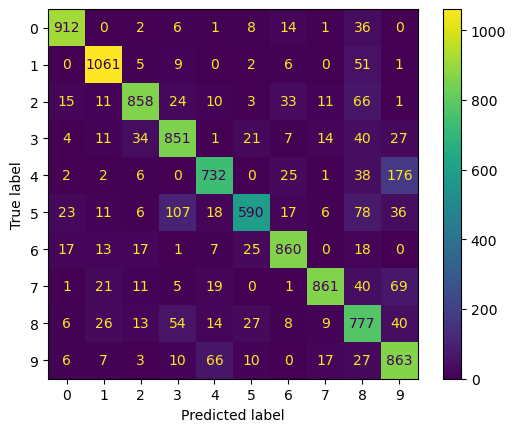

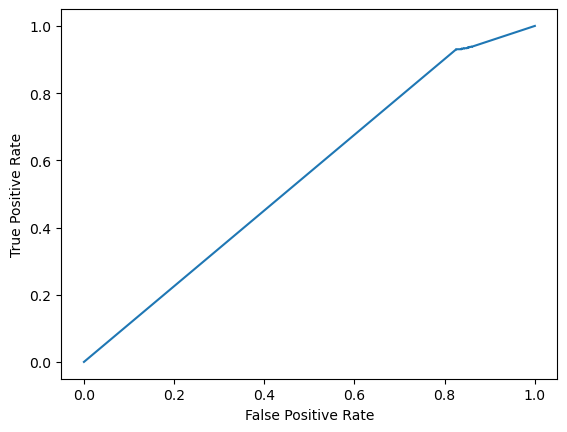

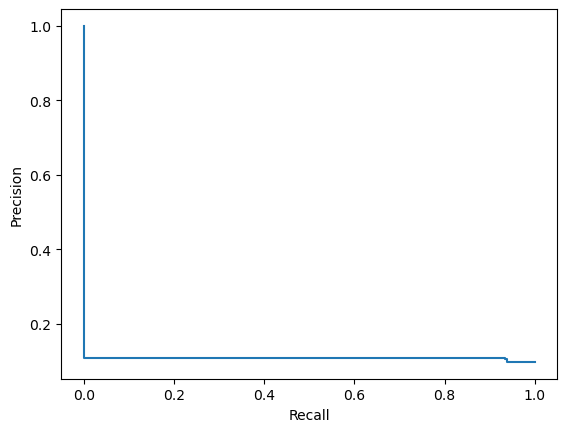

In [20]:
# Train a simple MultinomialNB model and evaluate on both the train & test set.
# Note the difference in accuracy.
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB(alpha = 1.0, fit_prior = True, class_prior = None,)


nb_model.fit(X_train, Y_train)
print(f'Accuracy on training data: {nb_model.score(X_train, Y_train):.2%}')
print(f'Accuracy on test data: {nb_model.score(X_test, Y_test):.2%}')

# have taken micro and average since all labels are equally useful and have almost similar distribution
Y_pred = nb_model.predict(X_test)

precision = sklearn.metrics.precision_score(Y_test, Y_pred, average='micro')
print(f'Model precision: {precision:.2%}')
precision = sklearn.metrics.precision_score(Y_test, Y_pred, average='weighted')
print(f'Model precision: {precision:.2%}')

# Perform 10-fold cross validation
scores = cross_val_score(nb_model, X, Y, cv=10)  # What happens if we raise/lower cv?
print(f'Average score: {scores.mean():.2%}')

# First, let's make this a binary problem.
Y_binary = (Y == 1).astype(int)  # Tangent: what's one risk with this dataset?

# Print a few different types of scores on the data using cross-validation.
scores = cross_val_score(nb_model, X, Y_binary, cv=10, scoring='accuracy')
print(f'Average accuracy: {scores.mean():.2%}')
scores = cross_val_score(nb_model, X, Y_binary, cv=10, scoring='precision')
print(f'Average precision: {scores.mean():.2%}')
scores = cross_val_score(nb_model, X, Y_binary, cv=10, scoring='recall')
print(f'Average recall: {scores.mean():.2%}')
scores = cross_val_score(nb_model, X, Y_binary, cv=10, scoring='f1')
print(f'Average f1: {scores.mean():.2%}')

print('Confusion Matrix: ')
# Let's get a closer look of the types of mistakes by plotting the confusion matrix.
cm = confusion_matrix(Y_test, Y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

print('Predction of class probabilities: ')
# What if we first inspected elements where the model seems most "certain"?
Y_pred = nb_model.predict(X_test)
prediction_probs = nb_model.predict_proba(X_test)  # Get the predicted probabilities for each class on all test samples.
max_probs = prediction_probs.max(axis=1)  # For each prediction, keep the highest probability

# Inspect the predictions in order of model confidence, summing successes and overall observations as we go along.
# Note that we don't use the terminology of precision here since we just look at
# all predictions, so the final metric matches the model "score" from before.
correct = 0
observations = 0
for ground_truth, prediction, _ in sorted(zip(Y_test, Y_pred, max_probs), key=lambda e: e[-1], reverse=True):
  if ground_truth == prediction:
    correct += 1
  observations += 1
# Print untill the cutoff point where the accuracy so far is equivalent to the accuracy of model 
  if nb_model.score(X_test, Y_test) < (correct / observations):
      print(f'GT: {ground_truth}, pred: {prediction}, accuracy so far: {correct / observations:.2%}')
    
# Let's formalize this intuition by producing an ROC curve, focusing on precision
# at predicting a specific label now.
prediction_probs = nb_model.predict_proba(X_test)
probs_of_gt_labels = prediction_probs[range(prediction_probs.shape[0]), Y_test]  # This gets the probability associated with the ground-truth label from each prediction.
fpr, tpr, thresholds = sklearn.metrics.roc_curve(Y_test, probs_of_gt_labels, pos_label=0)  # Swap with pos_label=1: why does the score get so much worse?

print('Print a few samples of the FPR, TPR, and Threshold arrays: ')
print(fpr[:5])
print(tpr[:5])
print(thresholds[:5])  # The first threshold is arbitrarily set much higher than p=1

# Display the ROC Curve
print('Display the ROC Curve')
sklearn.metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# The equivalent precision/recall curve. Note that recall = TPR, but precision != FPR
print('Display the Precision vs Recall Curve')
prec, recall, _ = sklearn.metrics.precision_recall_curve(Y_test, probs_of_gt_labels, pos_label=0)
pr_display = sklearn.metrics.PrecisionRecallDisplay(precision=prec, recall=recall).plot()




In [22]:
# Grid search to find the best parameters. NB Model.

param_grid = {'alpha': [0.5, 1.0, 1.5, 2.0, 2.5], 'fit_prior': [True, False], 'class_prior': [None, [1/10]*len(np.unique(Y_train))]}

'''
Based on searches on chat GPT, I have created the GridSearchCV.
Learnings - 
The fit_prior hyperparameter in the Naive Bayes model determines whether to learn class prior probabilities 
from the training data or to use a uniform prior. By setting fit_prior to True, 
the model will learn class prior probabilities from the training data, 
while setting it to False will use a uniform prior.
'''
search = sklearn.model_selection.GridSearchCV(nb_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)
search.fit(X_train, Y_train)

# Taken inspiration from https://www.projectpro.io/recipes/find-optimal-parameters-using-randomizedsearchcv-for-regression
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", search.best_estimator_)
print("\n The best score across ALL searched params:\n", search.best_score_)
print("\n The best parameters across ALL searched params:\n", search.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
 Results from Random Search 

 The best estimator across ALL searched params:
 MultinomialNB(alpha=0.5)

 The best score across ALL searched params:
 0.8235666666666666

 The best parameters across ALL searched params:
 {'alpha': 0.5, 'class_prior': None, 'fit_prior': True}


C:\Users\miloy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on training data: 94.17%
Accuracy on test data: 92.20%
Model precision: 92.20%
Model precision: 92.19%
Confusion Matrix: 
Predction of class probabilities: 
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 7, pred: 7, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 2, pred: 2, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 7, pred: 7, accuracy so far: 100.00%
GT: 2, pred: 2, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 2, pred: 2, accuracy so far: 100.00%
GT: 2, pred: 2, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 4, pred: 4, accuracy so far: 100.00%
GT: 2, pred: 2, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 2, pred: 2, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 0, pred: 0

GT: 0, pred: 0, accuracy so far: 100.00%
GT: 2, pred: 2, accuracy so far: 100.00%
GT: 2, pred: 2, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 6, pred: 6, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 4, pred: 4, accuracy so far: 100.00%
GT: 9, pred: 9, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 2, pred: 2, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 6, pred: 6, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 3, pred: 3, accuracy so far: 100.00%
GT: 6, pred: 6, accuracy so far: 100.00%
GT: 3, pred: 3, accuracy so far: 100.00%
GT: 3, pred: 3, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 7, pred: 7, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 4, pred: 4, accuracy so far: 100.00%
GT: 0, pred: 0, accuracy so far: 100.00%
GT: 2, pred: 2, accuracy so far: 100.00%
GT: 4, pred: 4, 

GT: 0, pred: 0, accuracy so far: 99.75%
GT: 3, pred: 3, accuracy so far: 99.75%
GT: 2, pred: 2, accuracy so far: 99.75%
GT: 2, pred: 2, accuracy so far: 99.75%
GT: 7, pred: 7, accuracy so far: 99.75%
GT: 2, pred: 2, accuracy so far: 99.75%
GT: 4, pred: 4, accuracy so far: 99.75%
GT: 0, pred: 0, accuracy so far: 99.75%
GT: 7, pred: 7, accuracy so far: 99.75%
GT: 3, pred: 3, accuracy so far: 99.75%
GT: 0, pred: 0, accuracy so far: 99.76%
GT: 6, pred: 6, accuracy so far: 99.76%
GT: 0, pred: 0, accuracy so far: 99.76%
GT: 2, pred: 2, accuracy so far: 99.76%
GT: 0, pred: 0, accuracy so far: 99.76%
GT: 9, pred: 9, accuracy so far: 99.76%
GT: 2, pred: 2, accuracy so far: 99.76%
GT: 0, pred: 0, accuracy so far: 99.76%
GT: 0, pred: 0, accuracy so far: 99.76%
GT: 4, pred: 4, accuracy so far: 99.76%
GT: 4, pred: 4, accuracy so far: 99.76%
GT: 0, pred: 0, accuracy so far: 99.76%
GT: 4, pred: 4, accuracy so far: 99.76%
GT: 7, pred: 7, accuracy so far: 99.76%
GT: 6, pred: 6, accuracy so far: 99.76%


GT: 7, pred: 7, accuracy so far: 99.84%
GT: 0, pred: 0, accuracy so far: 99.84%
GT: 6, pred: 6, accuracy so far: 99.84%
GT: 7, pred: 7, accuracy so far: 99.84%
GT: 0, pred: 0, accuracy so far: 99.84%
GT: 0, pred: 0, accuracy so far: 99.84%
GT: 3, pred: 3, accuracy so far: 99.84%
GT: 0, pred: 0, accuracy so far: 99.84%
GT: 7, pred: 7, accuracy so far: 99.84%
GT: 0, pred: 0, accuracy so far: 99.84%
GT: 7, pred: 7, accuracy so far: 99.84%
GT: 7, pred: 7, accuracy so far: 99.84%
GT: 7, pred: 7, accuracy so far: 99.84%
GT: 6, pred: 6, accuracy so far: 99.84%
GT: 0, pred: 0, accuracy so far: 99.84%
GT: 6, pred: 6, accuracy so far: 99.84%
GT: 6, pred: 6, accuracy so far: 99.84%
GT: 6, pred: 6, accuracy so far: 99.84%
GT: 0, pred: 0, accuracy so far: 99.84%
GT: 6, pred: 6, accuracy so far: 99.84%
GT: 0, pred: 0, accuracy so far: 99.84%
GT: 0, pred: 0, accuracy so far: 99.84%
GT: 0, pred: 0, accuracy so far: 99.84%
GT: 5, pred: 5, accuracy so far: 99.84%
GT: 2, pred: 2, accuracy so far: 99.84%


GT: 5, pred: 5, accuracy so far: 99.75%
GT: 3, pred: 3, accuracy so far: 99.75%
GT: 7, pred: 7, accuracy so far: 99.75%
GT: 4, pred: 4, accuracy so far: 99.75%
GT: 0, pred: 0, accuracy so far: 99.76%
GT: 4, pred: 4, accuracy so far: 99.76%
GT: 6, pred: 6, accuracy so far: 99.76%
GT: 7, pred: 7, accuracy so far: 99.76%
GT: 2, pred: 2, accuracy so far: 99.76%
GT: 6, pred: 6, accuracy so far: 99.76%
GT: 2, pred: 2, accuracy so far: 99.76%
GT: 0, pred: 0, accuracy so far: 99.76%
GT: 6, pred: 6, accuracy so far: 99.76%
GT: 6, pred: 6, accuracy so far: 99.76%
GT: 0, pred: 0, accuracy so far: 99.76%
GT: 0, pred: 0, accuracy so far: 99.76%
GT: 2, pred: 2, accuracy so far: 99.76%
GT: 4, pred: 4, accuracy so far: 99.76%
GT: 6, pred: 6, accuracy so far: 99.76%
GT: 4, pred: 4, accuracy so far: 99.76%
GT: 2, pred: 2, accuracy so far: 99.76%
GT: 6, pred: 6, accuracy so far: 99.76%
GT: 2, pred: 2, accuracy so far: 99.76%
GT: 3, pred: 3, accuracy so far: 99.76%
GT: 7, pred: 7, accuracy so far: 99.76%


GT: 0, pred: 0, accuracy so far: 99.61%
GT: 5, pred: 5, accuracy so far: 99.61%
GT: 6, pred: 6, accuracy so far: 99.61%
GT: 6, pred: 6, accuracy so far: 99.61%
GT: 6, pred: 6, accuracy so far: 99.61%
GT: 6, pred: 6, accuracy so far: 99.61%
GT: 3, pred: 3, accuracy so far: 99.61%
GT: 4, pred: 4, accuracy so far: 99.61%
GT: 6, pred: 6, accuracy so far: 99.61%
GT: 0, pred: 0, accuracy so far: 99.61%
GT: 5, pred: 5, accuracy so far: 99.61%
GT: 0, pred: 0, accuracy so far: 99.61%
GT: 4, pred: 4, accuracy so far: 99.61%
GT: 0, pred: 0, accuracy so far: 99.61%
GT: 7, pred: 7, accuracy so far: 99.61%
GT: 6, pred: 6, accuracy so far: 99.61%
GT: 0, pred: 0, accuracy so far: 99.61%
GT: 4, pred: 4, accuracy so far: 99.61%
GT: 7, pred: 7, accuracy so far: 99.61%
GT: 0, pred: 0, accuracy so far: 99.61%
GT: 0, pred: 0, accuracy so far: 99.61%
GT: 2, pred: 2, accuracy so far: 99.62%
GT: 7, pred: 7, accuracy so far: 99.62%
GT: 0, pred: 0, accuracy so far: 99.62%
GT: 2, pred: 2, accuracy so far: 99.62%


GT: 0, pred: 0, accuracy so far: 99.51%
GT: 0, pred: 0, accuracy so far: 99.51%
GT: 6, pred: 6, accuracy so far: 99.51%
GT: 5, pred: 5, accuracy so far: 99.51%
GT: 6, pred: 6, accuracy so far: 99.51%
GT: 6, pred: 6, accuracy so far: 99.51%
GT: 7, pred: 7, accuracy so far: 99.51%
GT: 0, pred: 0, accuracy so far: 99.51%
GT: 2, pred: 2, accuracy so far: 99.51%
GT: 6, pred: 6, accuracy so far: 99.51%
GT: 7, pred: 7, accuracy so far: 99.51%
GT: 0, pred: 0, accuracy so far: 99.51%
GT: 2, pred: 2, accuracy so far: 99.51%
GT: 0, pred: 0, accuracy so far: 99.51%
GT: 2, pred: 2, accuracy so far: 99.52%
GT: 2, pred: 2, accuracy so far: 99.52%
GT: 7, pred: 7, accuracy so far: 99.52%
GT: 0, pred: 0, accuracy so far: 99.52%
GT: 2, pred: 2, accuracy so far: 99.52%
GT: 0, pred: 0, accuracy so far: 99.52%
GT: 0, pred: 0, accuracy so far: 99.52%
GT: 2, pred: 2, accuracy so far: 99.52%
GT: 7, pred: 7, accuracy so far: 99.52%
GT: 5, pred: 5, accuracy so far: 99.52%
GT: 2, pred: 2, accuracy so far: 99.52%


GT: 2, pred: 2, accuracy so far: 99.37%
GT: 5, pred: 5, accuracy so far: 99.37%
GT: 5, pred: 5, accuracy so far: 99.37%
GT: 3, pred: 3, accuracy so far: 99.37%
GT: 6, pred: 6, accuracy so far: 99.37%
GT: 8, pred: 8, accuracy so far: 99.37%
GT: 3, pred: 3, accuracy so far: 99.37%
GT: 6, pred: 6, accuracy so far: 99.37%
GT: 0, pred: 0, accuracy so far: 99.37%
GT: 3, pred: 3, accuracy so far: 99.37%
GT: 7, pred: 7, accuracy so far: 99.37%
GT: 0, pred: 0, accuracy so far: 99.38%
GT: 6, pred: 6, accuracy so far: 99.38%
GT: 0, pred: 0, accuracy so far: 99.38%
GT: 0, pred: 0, accuracy so far: 99.38%
GT: 0, pred: 0, accuracy so far: 99.38%
GT: 8, pred: 8, accuracy so far: 99.38%
GT: 6, pred: 6, accuracy so far: 99.38%
GT: 2, pred: 2, accuracy so far: 99.38%
GT: 6, pred: 6, accuracy so far: 99.38%
GT: 6, pred: 6, accuracy so far: 99.38%
GT: 4, pred: 4, accuracy so far: 99.38%
GT: 0, pred: 0, accuracy so far: 99.38%
GT: 4, pred: 4, accuracy so far: 99.38%
GT: 4, pred: 4, accuracy so far: 99.38%


GT: 6, pred: 6, accuracy so far: 99.39%
GT: 6, pred: 6, accuracy so far: 99.39%
GT: 7, pred: 7, accuracy so far: 99.39%
GT: 3, pred: 3, accuracy so far: 99.39%
GT: 2, pred: 2, accuracy so far: 99.39%
GT: 2, pred: 2, accuracy so far: 99.39%
GT: 6, pred: 6, accuracy so far: 99.39%
GT: 1, pred: 1, accuracy so far: 99.39%
GT: 4, pred: 4, accuracy so far: 99.39%
GT: 0, pred: 0, accuracy so far: 99.39%
GT: 0, pred: 0, accuracy so far: 99.39%
GT: 6, pred: 6, accuracy so far: 99.39%
GT: 0, pred: 0, accuracy so far: 99.39%
GT: 2, pred: 2, accuracy so far: 99.39%
GT: 4, pred: 4, accuracy so far: 99.39%
GT: 2, pred: 2, accuracy so far: 99.39%
GT: 3, pred: 3, accuracy so far: 99.39%
GT: 6, pred: 6, accuracy so far: 99.40%
GT: 0, pred: 0, accuracy so far: 99.40%
GT: 1, pred: 1, accuracy so far: 99.40%
GT: 5, pred: 5, accuracy so far: 99.40%
GT: 6, pred: 6, accuracy so far: 99.40%
GT: 7, pred: 7, accuracy so far: 99.40%
GT: 1, pred: 1, accuracy so far: 99.40%
GT: 6, pred: 6, accuracy so far: 99.40%


GT: 7, pred: 7, accuracy so far: 99.40%
GT: 5, pred: 5, accuracy so far: 99.40%
GT: 2, pred: 2, accuracy so far: 99.40%
GT: 0, pred: 0, accuracy so far: 99.40%
GT: 7, pred: 7, accuracy so far: 99.40%
GT: 0, pred: 0, accuracy so far: 99.40%
GT: 6, pred: 6, accuracy so far: 99.40%
GT: 3, pred: 3, accuracy so far: 99.40%
GT: 1, pred: 1, accuracy so far: 99.41%
GT: 8, pred: 8, accuracy so far: 99.41%
GT: 6, pred: 6, accuracy so far: 99.41%
GT: 6, pred: 6, accuracy so far: 99.41%
GT: 6, pred: 6, accuracy so far: 99.41%
GT: 8, pred: 8, accuracy so far: 99.41%
GT: 1, pred: 1, accuracy so far: 99.41%
GT: 6, pred: 6, accuracy so far: 99.41%
GT: 2, pred: 2, accuracy so far: 99.41%
GT: 6, pred: 6, accuracy so far: 99.41%
GT: 6, pred: 6, accuracy so far: 99.41%
GT: 7, pred: 7, accuracy so far: 99.41%
GT: 1, pred: 1, accuracy so far: 99.41%
GT: 3, pred: 3, accuracy so far: 99.41%
GT: 0, pred: 0, accuracy so far: 99.41%
GT: 2, pred: 2, accuracy so far: 99.41%
GT: 5, pred: 5, accuracy so far: 99.41%


GT: 1, pred: 1, accuracy so far: 99.46%
GT: 2, pred: 2, accuracy so far: 99.46%
GT: 4, pred: 4, accuracy so far: 99.46%
GT: 0, pred: 0, accuracy so far: 99.46%
GT: 2, pred: 2, accuracy so far: 99.46%
GT: 6, pred: 6, accuracy so far: 99.46%
GT: 1, pred: 1, accuracy so far: 99.46%
GT: 4, pred: 4, accuracy so far: 99.46%
GT: 6, pred: 6, accuracy so far: 99.46%
GT: 9, pred: 9, accuracy so far: 99.46%
GT: 1, pred: 1, accuracy so far: 99.47%
GT: 3, pred: 3, accuracy so far: 99.47%
GT: 4, pred: 4, accuracy so far: 99.47%
GT: 3, pred: 3, accuracy so far: 99.47%
GT: 0, pred: 0, accuracy so far: 99.47%
GT: 3, pred: 3, accuracy so far: 99.47%
GT: 5, pred: 5, accuracy so far: 99.47%
GT: 1, pred: 1, accuracy so far: 99.47%
GT: 0, pred: 0, accuracy so far: 99.47%
GT: 1, pred: 1, accuracy so far: 99.47%
GT: 8, pred: 8, accuracy so far: 99.47%
GT: 4, pred: 4, accuracy so far: 99.47%
GT: 1, pred: 1, accuracy so far: 99.47%
GT: 2, pred: 2, accuracy so far: 99.47%
GT: 0, pred: 0, accuracy so far: 99.47%


GT: 0, pred: 0, accuracy so far: 99.42%
GT: 5, pred: 5, accuracy so far: 99.42%
GT: 2, pred: 2, accuracy so far: 99.42%
GT: 0, pred: 0, accuracy so far: 99.42%
GT: 0, pred: 0, accuracy so far: 99.43%
GT: 6, pred: 6, accuracy so far: 99.43%
GT: 5, pred: 5, accuracy so far: 99.43%
GT: 1, pred: 1, accuracy so far: 99.43%
GT: 4, pred: 4, accuracy so far: 99.43%
GT: 3, pred: 3, accuracy so far: 99.43%
GT: 3, pred: 3, accuracy so far: 99.43%
GT: 3, pred: 3, accuracy so far: 99.43%
GT: 3, pred: 3, accuracy so far: 99.43%
GT: 1, pred: 1, accuracy so far: 99.43%
GT: 4, pred: 4, accuracy so far: 99.43%
GT: 6, pred: 6, accuracy so far: 99.43%
GT: 4, pred: 4, accuracy so far: 99.43%
GT: 7, pred: 7, accuracy so far: 99.43%
GT: 5, pred: 5, accuracy so far: 99.43%
GT: 0, pred: 0, accuracy so far: 99.43%
GT: 0, pred: 0, accuracy so far: 99.43%
GT: 7, pred: 7, accuracy so far: 99.43%
GT: 1, pred: 1, accuracy so far: 99.43%
GT: 7, pred: 7, accuracy so far: 99.43%
GT: 1, pred: 1, accuracy so far: 99.43%


GT: 1, pred: 1, accuracy so far: 99.31%
GT: 6, pred: 6, accuracy so far: 99.31%
GT: 2, pred: 1, accuracy so far: 99.27%
GT: 0, pred: 0, accuracy so far: 99.27%
GT: 6, pred: 6, accuracy so far: 99.27%
GT: 6, pred: 6, accuracy so far: 99.27%
GT: 3, pred: 3, accuracy so far: 99.27%
GT: 4, pred: 4, accuracy so far: 99.27%
GT: 4, pred: 4, accuracy so far: 99.27%
GT: 6, pred: 6, accuracy so far: 99.27%
GT: 3, pred: 3, accuracy so far: 99.27%
GT: 1, pred: 1, accuracy so far: 99.27%
GT: 4, pred: 4, accuracy so far: 99.27%
GT: 0, pred: 0, accuracy so far: 99.27%
GT: 8, pred: 8, accuracy so far: 99.27%
GT: 8, pred: 8, accuracy so far: 99.27%
GT: 7, pred: 7, accuracy so far: 99.27%
GT: 7, pred: 7, accuracy so far: 99.27%
GT: 4, pred: 4, accuracy so far: 99.28%
GT: 8, pred: 8, accuracy so far: 99.28%
GT: 0, pred: 0, accuracy so far: 99.28%
GT: 2, pred: 2, accuracy so far: 99.28%
GT: 7, pred: 7, accuracy so far: 99.28%
GT: 1, pred: 1, accuracy so far: 99.28%
GT: 3, pred: 3, accuracy so far: 99.28%


GT: 7, pred: 7, accuracy so far: 99.29%
GT: 2, pred: 2, accuracy so far: 99.29%
GT: 4, pred: 4, accuracy so far: 99.29%
GT: 2, pred: 2, accuracy so far: 99.29%
GT: 1, pred: 1, accuracy so far: 99.29%
GT: 1, pred: 1, accuracy so far: 99.29%
GT: 5, pred: 5, accuracy so far: 99.29%
GT: 1, pred: 1, accuracy so far: 99.29%
GT: 6, pred: 6, accuracy so far: 99.29%
GT: 2, pred: 2, accuracy so far: 99.29%
GT: 3, pred: 3, accuracy so far: 99.29%
GT: 4, pred: 4, accuracy so far: 99.29%
GT: 6, pred: 6, accuracy so far: 99.29%
GT: 9, pred: 9, accuracy so far: 99.29%
GT: 5, pred: 5, accuracy so far: 99.29%
GT: 2, pred: 2, accuracy so far: 99.29%
GT: 5, pred: 5, accuracy so far: 99.29%
GT: 1, pred: 1, accuracy so far: 99.29%
GT: 1, pred: 1, accuracy so far: 99.29%
GT: 6, pred: 6, accuracy so far: 99.29%
GT: 1, pred: 1, accuracy so far: 99.29%
GT: 1, pred: 1, accuracy so far: 99.29%
GT: 1, pred: 1, accuracy so far: 99.29%
GT: 1, pred: 1, accuracy so far: 99.29%
GT: 9, pred: 9, accuracy so far: 99.29%


GT: 6, pred: 6, accuracy so far: 99.20%
GT: 2, pred: 1, accuracy so far: 99.17%
GT: 6, pred: 6, accuracy so far: 99.17%
GT: 5, pred: 5, accuracy so far: 99.17%
GT: 4, pred: 4, accuracy so far: 99.17%
GT: 6, pred: 6, accuracy so far: 99.17%
GT: 1, pred: 1, accuracy so far: 99.17%
GT: 8, pred: 8, accuracy so far: 99.17%
GT: 1, pred: 1, accuracy so far: 99.17%
GT: 1, pred: 1, accuracy so far: 99.17%
GT: 1, pred: 1, accuracy so far: 99.17%
GT: 2, pred: 2, accuracy so far: 99.17%
GT: 1, pred: 1, accuracy so far: 99.17%
GT: 0, pred: 0, accuracy so far: 99.17%
GT: 7, pred: 7, accuracy so far: 99.17%
GT: 4, pred: 4, accuracy so far: 99.17%
GT: 1, pred: 1, accuracy so far: 99.17%
GT: 7, pred: 7, accuracy so far: 99.17%
GT: 3, pred: 3, accuracy so far: 99.17%
GT: 0, pred: 0, accuracy so far: 99.17%
GT: 7, pred: 7, accuracy so far: 99.17%
GT: 0, pred: 0, accuracy so far: 99.17%
GT: 2, pred: 2, accuracy so far: 99.17%
GT: 7, pred: 7, accuracy so far: 99.17%
GT: 3, pred: 3, accuracy so far: 99.17%


GT: 5, pred: 5, accuracy so far: 99.16%
GT: 0, pred: 0, accuracy so far: 99.16%
GT: 1, pred: 1, accuracy so far: 99.16%
GT: 1, pred: 1, accuracy so far: 99.16%
GT: 3, pred: 3, accuracy so far: 99.16%
GT: 4, pred: 4, accuracy so far: 99.16%
GT: 2, pred: 2, accuracy so far: 99.16%
GT: 7, pred: 7, accuracy so far: 99.16%
GT: 3, pred: 3, accuracy so far: 99.16%
GT: 2, pred: 2, accuracy so far: 99.16%
GT: 2, pred: 2, accuracy so far: 99.16%
GT: 1, pred: 1, accuracy so far: 99.16%
GT: 7, pred: 7, accuracy so far: 99.16%
GT: 0, pred: 0, accuracy so far: 99.16%
GT: 4, pred: 4, accuracy so far: 99.16%
GT: 7, pred: 7, accuracy so far: 99.16%
GT: 4, pred: 4, accuracy so far: 99.16%
GT: 9, pred: 9, accuracy so far: 99.16%
GT: 8, pred: 8, accuracy so far: 99.16%
GT: 1, pred: 1, accuracy so far: 99.16%
GT: 6, pred: 6, accuracy so far: 99.16%
GT: 5, pred: 5, accuracy so far: 99.16%
GT: 4, pred: 4, accuracy so far: 99.16%
GT: 4, pred: 4, accuracy so far: 99.16%
GT: 5, pred: 5, accuracy so far: 99.16%


GT: 6, pred: 6, accuracy so far: 99.09%
GT: 0, pred: 0, accuracy so far: 99.09%
GT: 1, pred: 1, accuracy so far: 99.09%
GT: 2, pred: 2, accuracy so far: 99.09%
GT: 7, pred: 7, accuracy so far: 99.09%
GT: 4, pred: 4, accuracy so far: 99.09%
GT: 1, pred: 1, accuracy so far: 99.09%
GT: 3, pred: 3, accuracy so far: 99.09%
GT: 6, pred: 6, accuracy so far: 99.09%
GT: 7, pred: 7, accuracy so far: 99.09%
GT: 6, pred: 6, accuracy so far: 99.09%
GT: 8, pred: 8, accuracy so far: 99.09%
GT: 0, pred: 0, accuracy so far: 99.09%
GT: 6, pred: 6, accuracy so far: 99.09%
GT: 1, pred: 1, accuracy so far: 99.09%
GT: 6, pred: 6, accuracy so far: 99.09%
GT: 1, pred: 1, accuracy so far: 99.09%
GT: 6, pred: 6, accuracy so far: 99.09%
GT: 9, pred: 9, accuracy so far: 99.09%
GT: 3, pred: 3, accuracy so far: 99.09%
GT: 5, pred: 5, accuracy so far: 99.09%
GT: 7, pred: 7, accuracy so far: 99.09%
GT: 8, pred: 8, accuracy so far: 99.09%
GT: 9, pred: 9, accuracy so far: 99.09%
GT: 1, pred: 1, accuracy so far: 99.09%


GT: 2, pred: 8, accuracy so far: 99.03%
GT: 5, pred: 5, accuracy so far: 99.03%
GT: 1, pred: 1, accuracy so far: 99.03%
GT: 1, pred: 1, accuracy so far: 99.03%
GT: 5, pred: 5, accuracy so far: 99.03%
GT: 3, pred: 3, accuracy so far: 99.03%
GT: 5, pred: 5, accuracy so far: 99.03%
GT: 1, pred: 1, accuracy so far: 99.03%
GT: 1, pred: 1, accuracy so far: 99.03%
GT: 5, pred: 5, accuracy so far: 99.03%
GT: 8, pred: 8, accuracy so far: 99.03%
GT: 1, pred: 1, accuracy so far: 99.03%
GT: 5, pred: 5, accuracy so far: 99.03%
GT: 0, pred: 0, accuracy so far: 99.03%
GT: 5, pred: 5, accuracy so far: 99.03%
GT: 1, pred: 1, accuracy so far: 99.03%
GT: 8, pred: 8, accuracy so far: 99.03%
GT: 1, pred: 1, accuracy so far: 99.03%
GT: 1, pred: 1, accuracy so far: 99.03%
GT: 2, pred: 2, accuracy so far: 99.03%
GT: 7, pred: 7, accuracy so far: 99.03%
GT: 1, pred: 1, accuracy so far: 99.03%
GT: 7, pred: 7, accuracy so far: 99.03%
GT: 5, pred: 5, accuracy so far: 99.03%
GT: 0, pred: 0, accuracy so far: 99.03%


GT: 4, pred: 4, accuracy so far: 99.05%
GT: 0, pred: 0, accuracy so far: 99.06%
GT: 0, pred: 0, accuracy so far: 99.06%
GT: 3, pred: 3, accuracy so far: 99.06%
GT: 6, pred: 6, accuracy so far: 99.06%
GT: 5, pred: 5, accuracy so far: 99.06%
GT: 8, pred: 8, accuracy so far: 99.06%
GT: 1, pred: 1, accuracy so far: 99.06%
GT: 0, pred: 0, accuracy so far: 99.06%
GT: 7, pred: 7, accuracy so far: 99.06%
GT: 1, pred: 1, accuracy so far: 99.06%
GT: 6, pred: 6, accuracy so far: 99.06%
GT: 2, pred: 2, accuracy so far: 99.06%
GT: 7, pred: 7, accuracy so far: 99.06%
GT: 2, pred: 2, accuracy so far: 99.06%
GT: 1, pred: 1, accuracy so far: 99.06%
GT: 9, pred: 9, accuracy so far: 99.06%
GT: 2, pred: 2, accuracy so far: 99.06%
GT: 4, pred: 4, accuracy so far: 99.06%
GT: 7, pred: 7, accuracy so far: 99.06%
GT: 4, pred: 4, accuracy so far: 99.06%
GT: 1, pred: 1, accuracy so far: 99.06%
GT: 1, pred: 1, accuracy so far: 99.06%
GT: 1, pred: 1, accuracy so far: 99.06%
GT: 3, pred: 3, accuracy so far: 99.06%


GT: 7, pred: 7, accuracy so far: 99.08%
GT: 3, pred: 3, accuracy so far: 99.08%
GT: 6, pred: 6, accuracy so far: 99.08%
GT: 3, pred: 3, accuracy so far: 99.08%
GT: 1, pred: 1, accuracy so far: 99.08%
GT: 8, pred: 8, accuracy so far: 99.08%
GT: 1, pred: 1, accuracy so far: 99.08%
GT: 3, pred: 3, accuracy so far: 99.08%
GT: 7, pred: 7, accuracy so far: 99.08%
GT: 1, pred: 1, accuracy so far: 99.08%
GT: 6, pred: 6, accuracy so far: 99.08%
GT: 3, pred: 3, accuracy so far: 99.08%
GT: 3, pred: 3, accuracy so far: 99.08%
GT: 9, pred: 9, accuracy so far: 99.08%
GT: 9, pred: 9, accuracy so far: 99.08%
GT: 3, pred: 3, accuracy so far: 99.08%
GT: 5, pred: 5, accuracy so far: 99.08%
GT: 3, pred: 3, accuracy so far: 99.08%
GT: 4, pred: 4, accuracy so far: 99.08%
GT: 2, pred: 2, accuracy so far: 99.08%
GT: 7, pred: 7, accuracy so far: 99.08%
GT: 3, pred: 3, accuracy so far: 99.08%
GT: 1, pred: 1, accuracy so far: 99.08%
GT: 0, pred: 0, accuracy so far: 99.08%
GT: 1, pred: 1, accuracy so far: 99.09%


GT: 8, pred: 8, accuracy so far: 99.05%
GT: 6, pred: 6, accuracy so far: 99.05%
GT: 5, pred: 5, accuracy so far: 99.05%
GT: 1, pred: 1, accuracy so far: 99.05%
GT: 3, pred: 3, accuracy so far: 99.05%
GT: 6, pred: 6, accuracy so far: 99.05%
GT: 2, pred: 2, accuracy so far: 99.05%
GT: 1, pred: 1, accuracy so far: 99.05%
GT: 2, pred: 2, accuracy so far: 99.05%
GT: 2, pred: 2, accuracy so far: 99.05%
GT: 7, pred: 7, accuracy so far: 99.05%
GT: 7, pred: 7, accuracy so far: 99.06%
GT: 5, pred: 5, accuracy so far: 99.06%
GT: 7, pred: 7, accuracy so far: 99.06%
GT: 2, pred: 2, accuracy so far: 99.06%
GT: 6, pred: 6, accuracy so far: 99.06%
GT: 4, pred: 4, accuracy so far: 99.06%
GT: 5, pred: 5, accuracy so far: 99.06%
GT: 8, pred: 8, accuracy so far: 99.06%
GT: 6, pred: 6, accuracy so far: 99.06%
GT: 6, pred: 6, accuracy so far: 99.06%
GT: 9, pred: 9, accuracy so far: 99.06%
GT: 9, pred: 9, accuracy so far: 99.06%
GT: 6, pred: 6, accuracy so far: 99.06%
GT: 1, pred: 1, accuracy so far: 99.06%


GT: 0, pred: 0, accuracy so far: 99.10%
GT: 4, pred: 4, accuracy so far: 99.10%
GT: 9, pred: 9, accuracy so far: 99.10%
GT: 3, pred: 3, accuracy so far: 99.10%
GT: 7, pred: 7, accuracy so far: 99.10%
GT: 3, pred: 3, accuracy so far: 99.10%
GT: 7, pred: 7, accuracy so far: 99.10%
GT: 5, pred: 5, accuracy so far: 99.10%
GT: 7, pred: 7, accuracy so far: 99.10%
GT: 9, pred: 9, accuracy so far: 99.10%
GT: 6, pred: 6, accuracy so far: 99.10%
GT: 5, pred: 5, accuracy so far: 99.10%
GT: 2, pred: 2, accuracy so far: 99.10%
GT: 5, pred: 5, accuracy so far: 99.10%
GT: 2, pred: 2, accuracy so far: 99.10%
GT: 3, pred: 3, accuracy so far: 99.10%
GT: 4, pred: 4, accuracy so far: 99.10%
GT: 1, pred: 1, accuracy so far: 99.10%
GT: 1, pred: 1, accuracy so far: 99.10%
GT: 5, pred: 5, accuracy so far: 99.10%
GT: 0, pred: 0, accuracy so far: 99.10%
GT: 1, pred: 1, accuracy so far: 99.10%
GT: 2, pred: 2, accuracy so far: 99.10%
GT: 7, pred: 7, accuracy so far: 99.10%
GT: 1, pred: 1, accuracy so far: 99.10%


GT: 7, pred: 7, accuracy so far: 99.07%
GT: 9, pred: 9, accuracy so far: 99.07%
GT: 2, pred: 2, accuracy so far: 99.07%
GT: 8, pred: 8, accuracy so far: 99.07%
GT: 3, pred: 3, accuracy so far: 99.07%
GT: 3, pred: 3, accuracy so far: 99.07%
GT: 7, pred: 7, accuracy so far: 99.07%
GT: 6, pred: 6, accuracy so far: 99.07%
GT: 9, pred: 9, accuracy so far: 99.07%
GT: 5, pred: 5, accuracy so far: 99.07%
GT: 9, pred: 9, accuracy so far: 99.07%
GT: 6, pred: 6, accuracy so far: 99.07%
GT: 8, pred: 8, accuracy so far: 99.08%
GT: 8, pred: 8, accuracy so far: 99.08%
GT: 4, pred: 4, accuracy so far: 99.08%
GT: 8, pred: 8, accuracy so far: 99.08%
GT: 4, pred: 4, accuracy so far: 99.08%
GT: 7, pred: 7, accuracy so far: 99.08%
GT: 1, pred: 1, accuracy so far: 99.08%
GT: 7, pred: 7, accuracy so far: 99.08%
GT: 2, pred: 2, accuracy so far: 99.08%
GT: 0, pred: 0, accuracy so far: 99.08%
GT: 1, pred: 1, accuracy so far: 99.08%
GT: 5, pred: 5, accuracy so far: 99.08%
GT: 8, pred: 8, accuracy so far: 99.08%


GT: 4, pred: 4, accuracy so far: 99.05%
GT: 7, pred: 7, accuracy so far: 99.05%
GT: 4, pred: 4, accuracy so far: 99.05%
GT: 8, pred: 8, accuracy so far: 99.05%
GT: 3, pred: 3, accuracy so far: 99.05%
GT: 0, pred: 0, accuracy so far: 99.05%
GT: 1, pred: 1, accuracy so far: 99.05%
GT: 7, pred: 7, accuracy so far: 99.05%
GT: 4, pred: 4, accuracy so far: 99.05%
GT: 1, pred: 1, accuracy so far: 99.05%
GT: 5, pred: 5, accuracy so far: 99.05%
GT: 1, pred: 1, accuracy so far: 99.05%
GT: 6, pred: 6, accuracy so far: 99.05%
GT: 8, pred: 8, accuracy so far: 99.05%
GT: 9, pred: 9, accuracy so far: 99.05%
GT: 7, pred: 7, accuracy so far: 99.05%
GT: 4, pred: 4, accuracy so far: 99.05%
GT: 0, pred: 0, accuracy so far: 99.05%
GT: 1, pred: 1, accuracy so far: 99.05%
GT: 1, pred: 1, accuracy so far: 99.05%
GT: 7, pred: 7, accuracy so far: 99.05%
GT: 8, pred: 8, accuracy so far: 99.05%
GT: 9, pred: 9, accuracy so far: 99.05%
GT: 4, pred: 4, accuracy so far: 99.05%
GT: 1, pred: 1, accuracy so far: 99.05%


GT: 6, pred: 6, accuracy so far: 99.01%
GT: 6, pred: 6, accuracy so far: 99.01%
GT: 7, pred: 7, accuracy so far: 99.01%
GT: 3, pred: 3, accuracy so far: 99.01%
GT: 6, pred: 6, accuracy so far: 99.01%
GT: 8, pred: 8, accuracy so far: 99.01%
GT: 8, pred: 8, accuracy so far: 99.01%
GT: 4, pred: 4, accuracy so far: 99.01%
GT: 5, pred: 5, accuracy so far: 99.01%
GT: 8, pred: 8, accuracy so far: 99.01%
GT: 9, pred: 9, accuracy so far: 99.01%
GT: 7, pred: 7, accuracy so far: 99.01%
GT: 1, pred: 1, accuracy so far: 99.01%
GT: 1, pred: 1, accuracy so far: 99.01%
GT: 1, pred: 1, accuracy so far: 99.01%
GT: 7, pred: 7, accuracy so far: 99.01%
GT: 2, pred: 2, accuracy so far: 99.01%
GT: 6, pred: 6, accuracy so far: 99.01%
GT: 3, pred: 3, accuracy so far: 99.01%
GT: 6, pred: 6, accuracy so far: 99.01%
GT: 5, pred: 5, accuracy so far: 99.01%
GT: 0, pred: 0, accuracy so far: 99.01%
GT: 1, pred: 1, accuracy so far: 99.01%
GT: 8, pred: 8, accuracy so far: 99.01%
GT: 1, pred: 1, accuracy so far: 99.01%


GT: 3, pred: 3, accuracy so far: 98.99%
GT: 6, pred: 6, accuracy so far: 98.99%
GT: 4, pred: 4, accuracy so far: 98.99%
GT: 1, pred: 1, accuracy so far: 98.99%
GT: 1, pred: 1, accuracy so far: 98.99%
GT: 7, pred: 7, accuracy so far: 98.99%
GT: 5, pred: 5, accuracy so far: 98.99%
GT: 1, pred: 1, accuracy so far: 98.99%
GT: 9, pred: 9, accuracy so far: 98.99%
GT: 9, pred: 9, accuracy so far: 98.99%
GT: 5, pred: 5, accuracy so far: 98.99%
GT: 1, pred: 1, accuracy so far: 98.99%
GT: 3, pred: 3, accuracy so far: 98.99%
GT: 1, pred: 1, accuracy so far: 98.99%
GT: 1, pred: 1, accuracy so far: 98.99%
GT: 3, pred: 3, accuracy so far: 98.99%
GT: 4, pred: 4, accuracy so far: 98.99%
GT: 4, pred: 4, accuracy so far: 98.99%
GT: 8, pred: 8, accuracy so far: 98.99%
GT: 6, pred: 6, accuracy so far: 98.99%
GT: 4, pred: 4, accuracy so far: 98.99%
GT: 7, pred: 7, accuracy so far: 98.99%
GT: 9, pred: 9, accuracy so far: 99.00%
GT: 9, pred: 9, accuracy so far: 99.00%
GT: 9, pred: 9, accuracy so far: 99.00%


GT: 1, pred: 1, accuracy so far: 98.97%
GT: 6, pred: 6, accuracy so far: 98.97%
GT: 7, pred: 7, accuracy so far: 98.97%
GT: 5, pred: 5, accuracy so far: 98.97%
GT: 8, pred: 8, accuracy so far: 98.97%
GT: 4, pred: 6, accuracy so far: 98.96%
GT: 1, pred: 1, accuracy so far: 98.96%
GT: 9, pred: 9, accuracy so far: 98.96%
GT: 5, pred: 5, accuracy so far: 98.96%
GT: 4, pred: 4, accuracy so far: 98.96%
GT: 5, pred: 5, accuracy so far: 98.96%
GT: 7, pred: 7, accuracy so far: 98.96%
GT: 1, pred: 1, accuracy so far: 98.96%
GT: 2, pred: 2, accuracy so far: 98.96%
GT: 2, pred: 2, accuracy so far: 98.96%
GT: 3, pred: 3, accuracy so far: 98.96%
GT: 5, pred: 5, accuracy so far: 98.96%
GT: 1, pred: 1, accuracy so far: 98.96%
GT: 8, pred: 8, accuracy so far: 98.96%
GT: 1, pred: 1, accuracy so far: 98.96%
GT: 5, pred: 5, accuracy so far: 98.96%
GT: 7, pred: 7, accuracy so far: 98.96%
GT: 8, pred: 8, accuracy so far: 98.96%
GT: 9, pred: 9, accuracy so far: 98.96%
GT: 9, pred: 9, accuracy so far: 98.96%


GT: 9, pred: 9, accuracy so far: 98.87%
GT: 6, pred: 6, accuracy so far: 98.87%
GT: 1, pred: 1, accuracy so far: 98.87%
GT: 3, pred: 3, accuracy so far: 98.87%
GT: 7, pred: 7, accuracy so far: 98.87%
GT: 1, pred: 1, accuracy so far: 98.87%
GT: 3, pred: 3, accuracy so far: 98.87%
GT: 6, pred: 6, accuracy so far: 98.87%
GT: 8, pred: 8, accuracy so far: 98.87%
GT: 4, pred: 4, accuracy so far: 98.87%
GT: 1, pred: 1, accuracy so far: 98.87%
GT: 8, pred: 8, accuracy so far: 98.87%
GT: 1, pred: 1, accuracy so far: 98.87%
GT: 8, pred: 8, accuracy so far: 98.87%
GT: 6, pred: 6, accuracy so far: 98.87%
GT: 7, pred: 7, accuracy so far: 98.87%
GT: 3, pred: 3, accuracy so far: 98.87%
GT: 7, pred: 7, accuracy so far: 98.87%
GT: 7, pred: 7, accuracy so far: 98.87%
GT: 0, pred: 0, accuracy so far: 98.87%
GT: 1, pred: 1, accuracy so far: 98.87%
GT: 2, pred: 2, accuracy so far: 98.87%
GT: 3, pred: 3, accuracy so far: 98.87%
GT: 4, pred: 4, accuracy so far: 98.87%
GT: 7, pred: 7, accuracy so far: 98.87%


GT: 8, pred: 8, accuracy so far: 98.87%
GT: 7, pred: 7, accuracy so far: 98.87%
GT: 6, pred: 6, accuracy so far: 98.87%
GT: 3, pred: 3, accuracy so far: 98.87%
GT: 7, pred: 7, accuracy so far: 98.87%
GT: 4, pred: 4, accuracy so far: 98.87%
GT: 6, pred: 6, accuracy so far: 98.88%
GT: 1, pred: 1, accuracy so far: 98.88%
GT: 3, pred: 3, accuracy so far: 98.88%
GT: 3, pred: 3, accuracy so far: 98.88%
GT: 8, pred: 8, accuracy so far: 98.88%
GT: 6, pred: 6, accuracy so far: 98.88%
GT: 8, pred: 8, accuracy so far: 98.88%
GT: 1, pred: 1, accuracy so far: 98.88%
GT: 9, pred: 9, accuracy so far: 98.88%
GT: 3, pred: 3, accuracy so far: 98.88%
GT: 3, pred: 3, accuracy so far: 98.88%
GT: 7, pred: 7, accuracy so far: 98.88%
GT: 5, pred: 5, accuracy so far: 98.88%
GT: 8, pred: 8, accuracy so far: 98.88%
GT: 7, pred: 7, accuracy so far: 98.88%
GT: 4, pred: 4, accuracy so far: 98.88%
GT: 8, pred: 8, accuracy so far: 98.88%
GT: 9, pred: 9, accuracy so far: 98.88%
GT: 3, pred: 3, accuracy so far: 98.88%


GT: 7, pred: 7, accuracy so far: 98.86%
GT: 8, pred: 8, accuracy so far: 98.86%
GT: 5, pred: 5, accuracy so far: 98.86%
GT: 4, pred: 4, accuracy so far: 98.86%
GT: 1, pred: 1, accuracy so far: 98.86%
GT: 0, pred: 0, accuracy so far: 98.86%
GT: 5, pred: 5, accuracy so far: 98.86%
GT: 5, pred: 5, accuracy so far: 98.86%
GT: 8, pred: 8, accuracy so far: 98.86%
GT: 4, pred: 4, accuracy so far: 98.86%
GT: 1, pred: 1, accuracy so far: 98.86%
GT: 9, pred: 9, accuracy so far: 98.86%
GT: 6, pred: 6, accuracy so far: 98.86%
GT: 6, pred: 6, accuracy so far: 98.86%
GT: 1, pred: 1, accuracy so far: 98.86%
GT: 8, pred: 8, accuracy so far: 98.87%
GT: 4, pred: 4, accuracy so far: 98.87%
GT: 1, pred: 1, accuracy so far: 98.87%
GT: 8, pred: 8, accuracy so far: 98.87%
GT: 3, pred: 3, accuracy so far: 98.87%
GT: 5, pred: 5, accuracy so far: 98.87%
GT: 9, pred: 9, accuracy so far: 98.87%
GT: 3, pred: 3, accuracy so far: 98.87%
GT: 4, pred: 4, accuracy so far: 98.87%
GT: 9, pred: 9, accuracy so far: 98.87%


GT: 8, pred: 8, accuracy so far: 98.77%
GT: 9, pred: 9, accuracy so far: 98.77%
GT: 8, pred: 8, accuracy so far: 98.77%
GT: 8, pred: 8, accuracy so far: 98.77%
GT: 8, pred: 8, accuracy so far: 98.77%
GT: 9, pred: 9, accuracy so far: 98.77%
GT: 6, pred: 6, accuracy so far: 98.77%
GT: 8, pred: 8, accuracy so far: 98.77%
GT: 7, pred: 7, accuracy so far: 98.77%
GT: 3, pred: 3, accuracy so far: 98.77%
GT: 5, pred: 5, accuracy so far: 98.77%
GT: 9, pred: 9, accuracy so far: 98.77%
GT: 0, pred: 0, accuracy so far: 98.77%
GT: 5, pred: 3, accuracy so far: 98.76%
GT: 2, pred: 2, accuracy so far: 98.76%
GT: 5, pred: 5, accuracy so far: 98.76%
GT: 9, pred: 9, accuracy so far: 98.76%
GT: 8, pred: 8, accuracy so far: 98.76%
GT: 3, pred: 3, accuracy so far: 98.76%
GT: 4, pred: 4, accuracy so far: 98.76%
GT: 5, pred: 5, accuracy so far: 98.76%
GT: 8, pred: 8, accuracy so far: 98.76%
GT: 0, pred: 0, accuracy so far: 98.76%
GT: 5, pred: 0, accuracy so far: 98.74%
GT: 1, pred: 1, accuracy so far: 98.74%


GT: 4, pred: 4, accuracy so far: 98.69%
GT: 7, pred: 7, accuracy so far: 98.69%
GT: 6, pred: 6, accuracy so far: 98.69%
GT: 9, pred: 9, accuracy so far: 98.69%
GT: 0, pred: 0, accuracy so far: 98.69%
GT: 7, pred: 7, accuracy so far: 98.69%
GT: 7, pred: 7, accuracy so far: 98.69%
GT: 1, pred: 1, accuracy so far: 98.69%
GT: 6, pred: 6, accuracy so far: 98.69%
GT: 5, pred: 5, accuracy so far: 98.69%
GT: 4, pred: 4, accuracy so far: 98.69%
GT: 9, pred: 9, accuracy so far: 98.69%
GT: 7, pred: 7, accuracy so far: 98.69%
GT: 9, pred: 9, accuracy so far: 98.69%
GT: 7, pred: 7, accuracy so far: 98.69%
GT: 5, pred: 5, accuracy so far: 98.69%
GT: 9, pred: 9, accuracy so far: 98.69%
GT: 3, pred: 3, accuracy so far: 98.69%
GT: 9, pred: 9, accuracy so far: 98.69%
GT: 9, pred: 9, accuracy so far: 98.69%
GT: 6, pred: 6, accuracy so far: 98.69%
GT: 8, pred: 8, accuracy so far: 98.69%
GT: 9, pred: 9, accuracy so far: 98.69%
GT: 1, pred: 1, accuracy so far: 98.69%
GT: 4, pred: 4, accuracy so far: 98.69%


GT: 3, pred: 3, accuracy so far: 98.59%
GT: 3, pred: 3, accuracy so far: 98.59%
GT: 8, pred: 8, accuracy so far: 98.59%
GT: 1, pred: 1, accuracy so far: 98.59%
GT: 7, pred: 7, accuracy so far: 98.59%
GT: 9, pred: 9, accuracy so far: 98.59%
GT: 8, pred: 8, accuracy so far: 98.59%
GT: 3, pred: 3, accuracy so far: 98.59%
GT: 9, pred: 9, accuracy so far: 98.59%
GT: 0, pred: 0, accuracy so far: 98.59%
GT: 8, pred: 8, accuracy so far: 98.59%
GT: 2, pred: 2, accuracy so far: 98.59%
GT: 3, pred: 3, accuracy so far: 98.59%
GT: 7, pred: 7, accuracy so far: 98.59%
GT: 1, pred: 1, accuracy so far: 98.59%
GT: 7, pred: 7, accuracy so far: 98.59%
GT: 5, pred: 5, accuracy so far: 98.59%
GT: 3, pred: 3, accuracy so far: 98.59%
GT: 6, pred: 6, accuracy so far: 98.59%
GT: 8, pred: 8, accuracy so far: 98.59%
GT: 3, pred: 3, accuracy so far: 98.59%
GT: 3, pred: 3, accuracy so far: 98.59%
GT: 7, pred: 7, accuracy so far: 98.59%
GT: 2, pred: 2, accuracy so far: 98.59%
GT: 2, pred: 2, accuracy so far: 98.59%


GT: 9, pred: 9, accuracy so far: 98.57%
GT: 8, pred: 8, accuracy so far: 98.57%
GT: 8, pred: 8, accuracy so far: 98.57%
GT: 9, pred: 9, accuracy so far: 98.57%
GT: 3, pred: 3, accuracy so far: 98.57%
GT: 1, pred: 1, accuracy so far: 98.58%
GT: 3, pred: 3, accuracy so far: 98.58%
GT: 9, pred: 9, accuracy so far: 98.58%
GT: 1, pred: 1, accuracy so far: 98.58%
GT: 3, pred: 3, accuracy so far: 98.58%
GT: 2, pred: 2, accuracy so far: 98.58%
GT: 8, pred: 8, accuracy so far: 98.58%
GT: 3, pred: 3, accuracy so far: 98.58%
GT: 9, pred: 9, accuracy so far: 98.58%
GT: 9, pred: 9, accuracy so far: 98.58%
GT: 2, pred: 2, accuracy so far: 98.58%
GT: 8, pred: 8, accuracy so far: 98.58%
GT: 4, pred: 4, accuracy so far: 98.58%
GT: 4, pred: 4, accuracy so far: 98.58%
GT: 1, pred: 1, accuracy so far: 98.58%
GT: 4, pred: 4, accuracy so far: 98.58%
GT: 8, pred: 8, accuracy so far: 98.58%
GT: 4, pred: 4, accuracy so far: 98.58%
GT: 6, pred: 6, accuracy so far: 98.58%
GT: 3, pred: 3, accuracy so far: 98.58%


GT: 2, pred: 2, accuracy so far: 98.52%
GT: 8, pred: 8, accuracy so far: 98.52%
GT: 3, pred: 3, accuracy so far: 98.52%
GT: 2, pred: 2, accuracy so far: 98.52%
GT: 4, pred: 4, accuracy so far: 98.52%
GT: 8, pred: 1, accuracy so far: 98.50%
GT: 2, pred: 8, accuracy so far: 98.49%
GT: 9, pred: 9, accuracy so far: 98.49%
GT: 5, pred: 5, accuracy so far: 98.49%
GT: 2, pred: 2, accuracy so far: 98.49%
GT: 8, pred: 8, accuracy so far: 98.49%
GT: 7, pred: 7, accuracy so far: 98.49%
GT: 6, pred: 6, accuracy so far: 98.49%
GT: 6, pred: 6, accuracy so far: 98.49%
GT: 5, pred: 8, accuracy so far: 98.48%
GT: 9, pred: 9, accuracy so far: 98.48%
GT: 9, pred: 9, accuracy so far: 98.48%
GT: 2, pred: 2, accuracy so far: 98.48%
GT: 9, pred: 9, accuracy so far: 98.48%
GT: 5, pred: 5, accuracy so far: 98.48%
GT: 0, pred: 0, accuracy so far: 98.48%
GT: 7, pred: 7, accuracy so far: 98.48%
GT: 9, pred: 9, accuracy so far: 98.48%
GT: 7, pred: 7, accuracy so far: 98.48%
GT: 9, pred: 9, accuracy so far: 98.48%


GT: 9, pred: 9, accuracy so far: 98.30%
GT: 7, pred: 7, accuracy so far: 98.30%
GT: 9, pred: 9, accuracy so far: 98.30%
GT: 9, pred: 9, accuracy so far: 98.30%
GT: 3, pred: 3, accuracy so far: 98.30%
GT: 2, pred: 2, accuracy so far: 98.30%
GT: 5, pred: 5, accuracy so far: 98.30%
GT: 3, pred: 3, accuracy so far: 98.30%
GT: 5, pred: 8, accuracy so far: 98.28%
GT: 9, pred: 9, accuracy so far: 98.28%
GT: 6, pred: 6, accuracy so far: 98.28%
GT: 9, pred: 7, accuracy so far: 98.27%
GT: 9, pred: 9, accuracy so far: 98.27%
GT: 8, pred: 0, accuracy so far: 98.26%
GT: 0, pred: 0, accuracy so far: 98.26%
GT: 7, pred: 7, accuracy so far: 98.26%
GT: 8, pred: 8, accuracy so far: 98.26%
GT: 9, pred: 9, accuracy so far: 98.26%
GT: 6, pred: 6, accuracy so far: 98.26%
GT: 8, pred: 8, accuracy so far: 98.26%
GT: 9, pred: 9, accuracy so far: 98.26%
GT: 8, pred: 8, accuracy so far: 98.26%
GT: 8, pred: 8, accuracy so far: 98.26%
GT: 8, pred: 8, accuracy so far: 98.26%
GT: 3, pred: 0, accuracy so far: 98.25%


GT: 7, pred: 7, accuracy so far: 98.13%
GT: 9, pred: 9, accuracy so far: 98.13%
GT: 8, pred: 8, accuracy so far: 98.13%
GT: 9, pred: 9, accuracy so far: 98.13%
GT: 8, pred: 8, accuracy so far: 98.13%
GT: 8, pred: 5, accuracy so far: 98.12%
GT: 6, pred: 6, accuracy so far: 98.12%
GT: 4, pred: 4, accuracy so far: 98.12%
GT: 9, pred: 9, accuracy so far: 98.12%
GT: 8, pred: 8, accuracy so far: 98.12%
GT: 1, pred: 1, accuracy so far: 98.12%
GT: 9, pred: 9, accuracy so far: 98.12%
GT: 0, pred: 0, accuracy so far: 98.12%
GT: 8, pred: 8, accuracy so far: 98.12%
GT: 7, pred: 7, accuracy so far: 98.12%
GT: 8, pred: 8, accuracy so far: 98.12%
GT: 6, pred: 6, accuracy so far: 98.12%
GT: 8, pred: 8, accuracy so far: 98.12%
GT: 1, pred: 1, accuracy so far: 98.12%
GT: 9, pred: 9, accuracy so far: 98.12%
GT: 6, pred: 6, accuracy so far: 98.12%
GT: 4, pred: 4, accuracy so far: 98.12%
GT: 0, pred: 0, accuracy so far: 98.12%
GT: 9, pred: 9, accuracy so far: 98.12%
GT: 8, pred: 8, accuracy so far: 98.12%


GT: 7, pred: 7, accuracy so far: 97.97%
GT: 4, pred: 4, accuracy so far: 97.97%
GT: 6, pred: 6, accuracy so far: 97.97%
GT: 8, pred: 8, accuracy so far: 97.97%
GT: 6, pred: 6, accuracy so far: 97.97%
GT: 6, pred: 6, accuracy so far: 97.97%
GT: 9, pred: 9, accuracy so far: 97.97%
GT: 4, pred: 6, accuracy so far: 97.96%
GT: 4, pred: 4, accuracy so far: 97.96%
GT: 6, pred: 5, accuracy so far: 97.95%
GT: 2, pred: 2, accuracy so far: 97.95%
GT: 7, pred: 7, accuracy so far: 97.95%
GT: 9, pred: 9, accuracy so far: 97.95%
GT: 5, pred: 5, accuracy so far: 97.95%
GT: 2, pred: 2, accuracy so far: 97.95%
GT: 3, pred: 3, accuracy so far: 97.95%
GT: 4, pred: 4, accuracy so far: 97.95%
GT: 2, pred: 2, accuracy so far: 97.95%
GT: 5, pred: 5, accuracy so far: 97.95%
GT: 7, pred: 7, accuracy so far: 97.95%
GT: 7, pred: 7, accuracy so far: 97.95%
GT: 0, pred: 0, accuracy so far: 97.95%
GT: 9, pred: 9, accuracy so far: 97.95%
GT: 9, pred: 9, accuracy so far: 97.95%
GT: 9, pred: 9, accuracy so far: 97.95%


GT: 9, pred: 9, accuracy so far: 97.87%
GT: 8, pred: 8, accuracy so far: 97.87%
GT: 4, pred: 4, accuracy so far: 97.87%
GT: 8, pred: 8, accuracy so far: 97.87%
GT: 3, pred: 3, accuracy so far: 97.87%
GT: 8, pred: 8, accuracy so far: 97.87%
GT: 6, pred: 6, accuracy so far: 97.87%
GT: 2, pred: 2, accuracy so far: 97.87%
GT: 1, pred: 1, accuracy so far: 97.87%
GT: 9, pred: 9, accuracy so far: 97.87%
GT: 5, pred: 5, accuracy so far: 97.87%
GT: 9, pred: 9, accuracy so far: 97.87%
GT: 7, pred: 7, accuracy so far: 97.87%
GT: 9, pred: 9, accuracy so far: 97.87%
GT: 4, pred: 4, accuracy so far: 97.87%
GT: 6, pred: 6, accuracy so far: 97.87%
GT: 4, pred: 4, accuracy so far: 97.87%
GT: 8, pred: 5, accuracy so far: 97.86%
GT: 1, pred: 1, accuracy so far: 97.86%
GT: 7, pred: 8, accuracy so far: 97.85%
GT: 9, pred: 9, accuracy so far: 97.85%
GT: 5, pred: 5, accuracy so far: 97.85%
GT: 9, pred: 9, accuracy so far: 97.85%
GT: 0, pred: 0, accuracy so far: 97.85%
GT: 1, pred: 1, accuracy so far: 97.85%


GT: 3, pred: 3, accuracy so far: 97.66%
GT: 2, pred: 2, accuracy so far: 97.66%
GT: 0, pred: 0, accuracy so far: 97.66%
GT: 1, pred: 1, accuracy so far: 97.66%
GT: 5, pred: 8, accuracy so far: 97.65%
GT: 5, pred: 5, accuracy so far: 97.65%
GT: 6, pred: 5, accuracy so far: 97.64%
GT: 7, pred: 7, accuracy so far: 97.64%
GT: 4, pred: 4, accuracy so far: 97.64%
GT: 0, pred: 0, accuracy so far: 97.64%
GT: 3, pred: 3, accuracy so far: 97.64%
GT: 0, pred: 0, accuracy so far: 97.64%
GT: 4, pred: 4, accuracy so far: 97.64%
GT: 8, pred: 8, accuracy so far: 97.64%
GT: 2, pred: 2, accuracy so far: 97.64%
GT: 3, pred: 3, accuracy so far: 97.64%
GT: 3, pred: 3, accuracy so far: 97.64%
GT: 8, pred: 8, accuracy so far: 97.64%
GT: 8, pred: 8, accuracy so far: 97.64%
GT: 9, pred: 9, accuracy so far: 97.64%
GT: 2, pred: 2, accuracy so far: 97.64%
GT: 6, pred: 1, accuracy so far: 97.63%
GT: 9, pred: 9, accuracy so far: 97.63%
GT: 4, pred: 4, accuracy so far: 97.63%
GT: 4, pred: 4, accuracy so far: 97.63%


GT: 8, pred: 3, accuracy so far: 97.33%
GT: 5, pred: 5, accuracy so far: 97.33%
GT: 2, pred: 2, accuracy so far: 97.33%
GT: 2, pred: 2, accuracy so far: 97.33%
GT: 3, pred: 3, accuracy so far: 97.33%
GT: 4, pred: 4, accuracy so far: 97.33%
GT: 8, pred: 8, accuracy so far: 97.33%
GT: 3, pred: 3, accuracy so far: 97.33%
GT: 3, pred: 3, accuracy so far: 97.34%
GT: 5, pred: 5, accuracy so far: 97.34%
GT: 7, pred: 1, accuracy so far: 97.32%
GT: 5, pred: 5, accuracy so far: 97.32%
GT: 7, pred: 7, accuracy so far: 97.32%
GT: 5, pred: 5, accuracy so far: 97.32%
GT: 5, pred: 5, accuracy so far: 97.33%
GT: 7, pred: 9, accuracy so far: 97.31%
GT: 8, pred: 8, accuracy so far: 97.31%
GT: 4, pred: 4, accuracy so far: 97.31%
GT: 9, pred: 9, accuracy so far: 97.31%
GT: 9, pred: 9, accuracy so far: 97.31%
GT: 9, pred: 9, accuracy so far: 97.31%
GT: 9, pred: 9, accuracy so far: 97.32%
GT: 5, pred: 5, accuracy so far: 97.32%
GT: 6, pred: 0, accuracy so far: 97.30%
GT: 7, pred: 7, accuracy so far: 97.30%


GT: 8, pred: 8, accuracy so far: 97.01%
GT: 6, pred: 6, accuracy so far: 97.01%
GT: 1, pred: 1, accuracy so far: 97.01%
GT: 2, pred: 2, accuracy so far: 97.01%
GT: 9, pred: 9, accuracy so far: 97.01%
GT: 7, pred: 7, accuracy so far: 97.01%
GT: 3, pred: 3, accuracy so far: 97.01%
GT: 2, pred: 2, accuracy so far: 97.01%
GT: 8, pred: 8, accuracy so far: 97.01%
GT: 2, pred: 2, accuracy so far: 97.01%
GT: 1, pred: 1, accuracy so far: 97.01%
GT: 7, pred: 7, accuracy so far: 97.01%
GT: 8, pred: 8, accuracy so far: 97.01%
GT: 8, pred: 8, accuracy so far: 97.01%
GT: 8, pred: 6, accuracy so far: 97.00%
GT: 9, pred: 9, accuracy so far: 97.00%
GT: 9, pred: 9, accuracy so far: 97.00%
GT: 8, pred: 8, accuracy so far: 97.00%
GT: 6, pred: 6, accuracy so far: 97.00%
GT: 8, pred: 8, accuracy so far: 97.00%
GT: 8, pred: 8, accuracy so far: 97.00%
GT: 2, pred: 2, accuracy so far: 97.00%
GT: 7, pred: 9, accuracy so far: 96.99%
GT: 3, pred: 3, accuracy so far: 96.99%
GT: 5, pred: 5, accuracy so far: 96.99%


GT: 2, pred: 2, accuracy so far: 96.64%
GT: 9, pred: 9, accuracy so far: 96.64%
GT: 4, pred: 4, accuracy so far: 96.64%
GT: 5, pred: 5, accuracy so far: 96.64%
GT: 8, pred: 8, accuracy so far: 96.64%
GT: 8, pred: 8, accuracy so far: 96.64%
GT: 3, pred: 3, accuracy so far: 96.64%
GT: 7, pred: 9, accuracy so far: 96.63%
GT: 8, pred: 3, accuracy so far: 96.62%
GT: 3, pred: 3, accuracy so far: 96.62%
GT: 9, pred: 9, accuracy so far: 96.62%
GT: 8, pred: 2, accuracy so far: 96.61%
GT: 4, pred: 9, accuracy so far: 96.60%
GT: 4, pred: 4, accuracy so far: 96.60%
GT: 8, pred: 3, accuracy so far: 96.59%
GT: 0, pred: 0, accuracy so far: 96.59%
GT: 5, pred: 5, accuracy so far: 96.59%
GT: 8, pred: 8, accuracy so far: 96.59%
GT: 7, pred: 3, accuracy so far: 96.58%
GT: 3, pred: 5, accuracy so far: 96.57%
GT: 9, pred: 9, accuracy so far: 96.57%
GT: 5, pred: 5, accuracy so far: 96.57%
GT: 5, pred: 5, accuracy so far: 96.57%
GT: 3, pred: 3, accuracy so far: 96.57%
GT: 6, pred: 6, accuracy so far: 96.57%


GT: 9, pred: 9, accuracy so far: 96.15%
GT: 7, pred: 7, accuracy so far: 96.16%
GT: 4, pred: 4, accuracy so far: 96.16%
GT: 5, pred: 5, accuracy so far: 96.16%
GT: 2, pred: 2, accuracy so far: 96.16%
GT: 5, pred: 5, accuracy so far: 96.16%
GT: 3, pred: 3, accuracy so far: 96.16%
GT: 9, pred: 3, accuracy so far: 96.15%
GT: 7, pred: 2, accuracy so far: 96.14%
GT: 3, pred: 3, accuracy so far: 96.14%
GT: 5, pred: 5, accuracy so far: 96.14%
GT: 9, pred: 9, accuracy so far: 96.14%
GT: 9, pred: 9, accuracy so far: 96.14%
GT: 7, pred: 2, accuracy so far: 96.13%
GT: 9, pred: 9, accuracy so far: 96.13%
GT: 8, pred: 8, accuracy so far: 96.13%
GT: 9, pred: 9, accuracy so far: 96.13%
GT: 3, pred: 3, accuracy so far: 96.13%
GT: 2, pred: 2, accuracy so far: 96.13%
GT: 8, pred: 8, accuracy so far: 96.13%
GT: 7, pred: 7, accuracy so far: 96.13%
GT: 8, pred: 8, accuracy so far: 96.13%
GT: 4, pred: 4, accuracy so far: 96.13%
GT: 5, pred: 5, accuracy so far: 96.13%
GT: 3, pred: 3, accuracy so far: 96.13%


GT: 3, pred: 3, accuracy so far: 95.72%
GT: 5, pred: 5, accuracy so far: 95.72%
GT: 9, pred: 9, accuracy so far: 95.72%
GT: 9, pred: 9, accuracy so far: 95.72%
GT: 5, pred: 5, accuracy so far: 95.73%
GT: 1, pred: 1, accuracy so far: 95.73%
GT: 3, pred: 3, accuracy so far: 95.73%
GT: 7, pred: 9, accuracy so far: 95.72%
GT: 4, pred: 4, accuracy so far: 95.72%
GT: 2, pred: 3, accuracy so far: 95.71%
GT: 5, pred: 8, accuracy so far: 95.70%
GT: 7, pred: 9, accuracy so far: 95.68%
GT: 8, pred: 9, accuracy so far: 95.67%
GT: 3, pred: 3, accuracy so far: 95.67%
GT: 1, pred: 1, accuracy so far: 95.68%
GT: 8, pred: 8, accuracy so far: 95.68%
GT: 9, pred: 9, accuracy so far: 95.68%
GT: 6, pred: 6, accuracy so far: 95.68%
GT: 4, pred: 9, accuracy so far: 95.67%
GT: 0, pred: 0, accuracy so far: 95.67%
GT: 8, pred: 8, accuracy so far: 95.67%
GT: 9, pred: 9, accuracy so far: 95.67%
GT: 9, pred: 9, accuracy so far: 95.67%
GT: 3, pred: 3, accuracy so far: 95.67%
GT: 2, pred: 2, accuracy so far: 95.67%


GT: 8, pred: 0, accuracy so far: 95.23%
GT: 5, pred: 3, accuracy so far: 95.22%
GT: 8, pred: 5, accuracy so far: 95.20%
GT: 3, pred: 8, accuracy so far: 95.19%
GT: 1, pred: 1, accuracy so far: 95.20%
GT: 7, pred: 7, accuracy so far: 95.20%
GT: 3, pred: 3, accuracy so far: 95.20%
GT: 2, pred: 8, accuracy so far: 95.19%
GT: 2, pred: 2, accuracy so far: 95.19%
GT: 2, pred: 8, accuracy so far: 95.18%
GT: 9, pred: 7, accuracy so far: 95.17%
GT: 7, pred: 0, accuracy so far: 95.16%
GT: 2, pred: 2, accuracy so far: 95.16%
GT: 9, pred: 9, accuracy so far: 95.16%
GT: 6, pred: 6, accuracy so far: 95.16%
GT: 8, pred: 8, accuracy so far: 95.16%
GT: 9, pred: 4, accuracy so far: 95.15%
GT: 8, pred: 5, accuracy so far: 95.14%
GT: 6, pred: 5, accuracy so far: 95.13%
GT: 3, pred: 8, accuracy so far: 95.12%
GT: 3, pred: 6, accuracy so far: 95.11%
GT: 2, pred: 2, accuracy so far: 95.11%
GT: 5, pred: 5, accuracy so far: 95.11%
GT: 8, pred: 8, accuracy so far: 95.11%
GT: 4, pred: 4, accuracy so far: 95.11%


GT: 5, pred: 5, accuracy so far: 94.55%
GT: 3, pred: 5, accuracy so far: 94.54%
GT: 2, pred: 2, accuracy so far: 94.54%
GT: 5, pred: 1, accuracy so far: 94.53%
GT: 5, pred: 5, accuracy so far: 94.53%
GT: 5, pred: 3, accuracy so far: 94.52%
GT: 9, pred: 7, accuracy so far: 94.51%
GT: 4, pred: 6, accuracy so far: 94.50%
GT: 2, pred: 8, accuracy so far: 94.49%
GT: 9, pred: 9, accuracy so far: 94.49%
GT: 9, pred: 9, accuracy so far: 94.49%
GT: 5, pred: 8, accuracy so far: 94.48%
GT: 8, pred: 8, accuracy so far: 94.48%
GT: 3, pred: 3, accuracy so far: 94.48%
GT: 5, pred: 5, accuracy so far: 94.48%
GT: 0, pred: 0, accuracy so far: 94.49%
GT: 6, pred: 6, accuracy so far: 94.49%
GT: 6, pred: 6, accuracy so far: 94.49%
GT: 7, pred: 1, accuracy so far: 94.48%
GT: 9, pred: 9, accuracy so far: 94.48%
GT: 9, pred: 9, accuracy so far: 94.48%
GT: 6, pred: 6, accuracy so far: 94.48%
GT: 6, pred: 0, accuracy so far: 94.47%
GT: 2, pred: 8, accuracy so far: 94.46%
GT: 2, pred: 6, accuracy so far: 94.45%


GT: 9, pred: 8, accuracy so far: 93.68%
GT: 5, pred: 8, accuracy so far: 93.67%
GT: 2, pred: 2, accuracy so far: 93.67%
GT: 0, pred: 0, accuracy so far: 93.67%
GT: 5, pred: 8, accuracy so far: 93.66%
GT: 3, pred: 9, accuracy so far: 93.65%
GT: 0, pred: 0, accuracy so far: 93.65%
GT: 9, pred: 9, accuracy so far: 93.65%
GT: 6, pred: 5, accuracy so far: 93.64%
GT: 0, pred: 2, accuracy so far: 93.63%
GT: 8, pred: 3, accuracy so far: 93.62%
GT: 3, pred: 8, accuracy so far: 93.61%
GT: 1, pred: 1, accuracy so far: 93.61%
GT: 8, pred: 8, accuracy so far: 93.61%
GT: 4, pred: 4, accuracy so far: 93.61%
GT: 5, pred: 3, accuracy so far: 93.60%
GT: 3, pred: 8, accuracy so far: 93.59%
GT: 2, pred: 5, accuracy so far: 93.59%
GT: 8, pred: 8, accuracy so far: 93.59%
GT: 1, pred: 1, accuracy so far: 93.59%
GT: 9, pred: 9, accuracy so far: 93.59%
GT: 9, pred: 9, accuracy so far: 93.59%
GT: 5, pred: 0, accuracy so far: 93.58%
GT: 6, pred: 6, accuracy so far: 93.58%
GT: 2, pred: 2, accuracy so far: 93.58%


GT: 4, pred: 8, accuracy so far: 92.71%
GT: 2, pred: 2, accuracy so far: 92.71%
GT: 0, pred: 0, accuracy so far: 92.71%
GT: 7, pred: 2, accuracy so far: 92.70%
GT: 9, pred: 9, accuracy so far: 92.70%
GT: 2, pred: 7, accuracy so far: 92.69%
GT: 3, pred: 8, accuracy so far: 92.68%
GT: 2, pred: 2, accuracy so far: 92.68%
GT: 3, pred: 5, accuracy so far: 92.68%
GT: 9, pred: 9, accuracy so far: 92.68%
GT: 2, pred: 3, accuracy so far: 92.67%
GT: 7, pred: 7, accuracy so far: 92.67%
GT: 3, pred: 3, accuracy so far: 92.67%
GT: 3, pred: 3, accuracy so far: 92.67%
GT: 3, pred: 3, accuracy so far: 92.67%
GT: 2, pred: 8, accuracy so far: 92.66%
GT: 2, pred: 8, accuracy so far: 92.65%
GT: 2, pred: 2, accuracy so far: 92.65%
GT: 4, pred: 4, accuracy so far: 92.65%
GT: 7, pred: 7, accuracy so far: 92.65%
GT: 3, pred: 2, accuracy so far: 92.64%
GT: 1, pred: 1, accuracy so far: 92.64%
GT: 5, pred: 6, accuracy so far: 92.64%
GT: 5, pred: 3, accuracy so far: 92.63%
GT: 8, pred: 2, accuracy so far: 92.62%


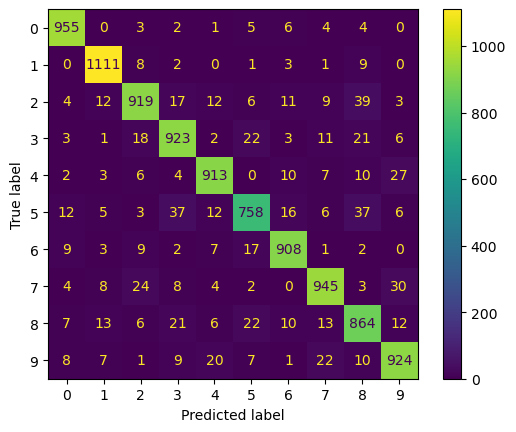

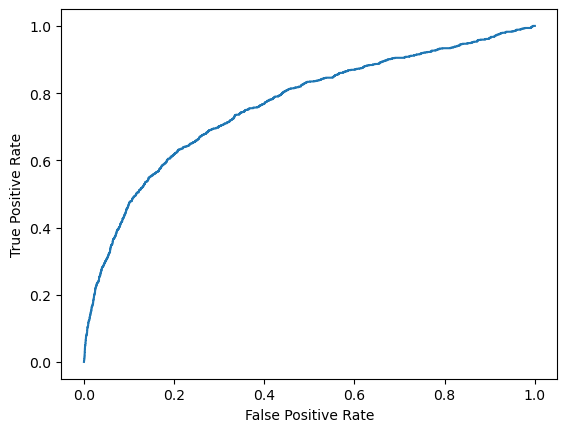

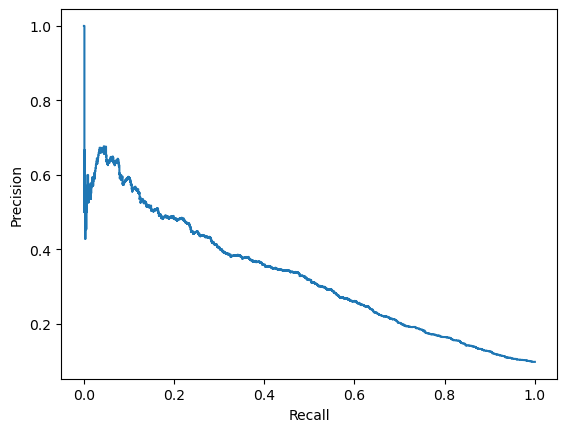

In [19]:
# Train a simple logistic regression model and evaluate on both the train & test set.
# Note the difference in accuracy.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

lr_model = LogisticRegression(
  penalty="none",  # See what happens if you toggle this to l2!
	class_weight=None,
	random_state=0,
	solver="lbfgs",
	multi_class="multinomial",
	max_iter=1000)

lr_model.fit(X_train, Y_train)
print(f'Accuracy on training data: {lr_model.score(X_train, Y_train):.2%}')
print(f'Accuracy on test data: {lr_model.score(X_test, Y_test):.2%}')

# have taken micro and average since all labels are equally useful and have almost similar distribution
Y_pred = lr_model.predict(X_test)

precision = sklearn.metrics.precision_score(Y_test, Y_pred, average='micro')
print(f'Model precision: {precision:.2%}')
precision = sklearn.metrics.precision_score(Y_test, Y_pred, average='weighted')
print(f'Model precision: {precision:.2%}')

print('Confusion Matrix: ')
# Let's get a closer look of the types of mistakes by plotting the confusion matrix.
cm = confusion_matrix(Y_test, Y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

print('Predction of class probabilities: ')
# What if we first inspected elements where the model seems most "certain"?
Y_pred = lr_model.predict(X_test)
prediction_probs = lr_model.predict_proba(X_test)  # Get the predicted probabilities for each class on all test samples.
max_probs = prediction_probs.max(axis=1)  # For each prediction, keep the highest probability

# Inspect the predictions in order of model confidence, summing successes and overall observations as we go along.
# Note that we don't use the terminology of precision here since we just look at
# all predictions, so the final metric matches the model "score" from before.
correct = 0
observations = 0
for ground_truth, prediction, _ in sorted(zip(Y_test, Y_pred, max_probs), key=lambda e: e[-1], reverse=True):
  if ground_truth == prediction:
    correct += 1
  observations += 1
# Print untill the cutoff point where the accuracy so far is equivalent to the accuracy of model 
  if lr_model.score(X_test, Y_test) < (correct / observations):
      print(f'GT: {ground_truth}, pred: {prediction}, accuracy so far: {correct / observations:.2%}')
    
# Let's formalize this intuition by producing an ROC curve, focusing on precision
# at predicting a specific label now.
prediction_probs = lr_model.predict_proba(X_test)
probs_of_gt_labels = prediction_probs[range(prediction_probs.shape[0]), Y_test]  # This gets the probability associated with the ground-truth label from each prediction.
fpr, tpr, thresholds = sklearn.metrics.roc_curve(Y_test, probs_of_gt_labels, pos_label=0)  # Swap with pos_label=1: why does the score get so much worse?

print('Print a few samples of the FPR, TPR, and Threshold arrays: ')
print(fpr[:5])
print(tpr[:5])
print(thresholds[:5])  # The first threshold is arbitrarily set much higher than p=1

# Display the ROC Curve
print('Display the ROC Curve')
sklearn.metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# The equivalent precision/recall curve. Note that recall = TPR, but precision != FPR
print('Display the Precision vs Recall Curve')
prec, recall, _ = sklearn.metrics.precision_recall_curve(Y_test, probs_of_gt_labels, pos_label=0)
pr_display = sklearn.metrics.PrecisionRecallDisplay(precision=prec, recall=recall).plot()


In [ ]:
# Grid search to find the best parameters Logistic Regression Model

param_grid = {'penalty': ['l1', 'l2', 'none'], 'class_weight': [None, 'balanced'], 'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']}

search = sklearn.model_selection.GridSearchCV(lr_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
search.fit(X_train, Y_train)

# Taken inspiration from https://www.projectpro.io/recipes/find-optimal-parameters-using-randomizedsearchcv-for-regression
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", search.best_estimator_)
print("\n The best score across ALL searched params:\n", search.best_score_)
print("\n The best parameters across ALL searched params:\n", search.best_params_)

In [21]:
import numpy as np
# Print model to pickle file
with open(r'nb.model', 'wb') as f:
    pickle.dump(nb_model, f)
    
with open(r'lr.model', 'wb') as f:
    pickle.dump(lr_model, f)
